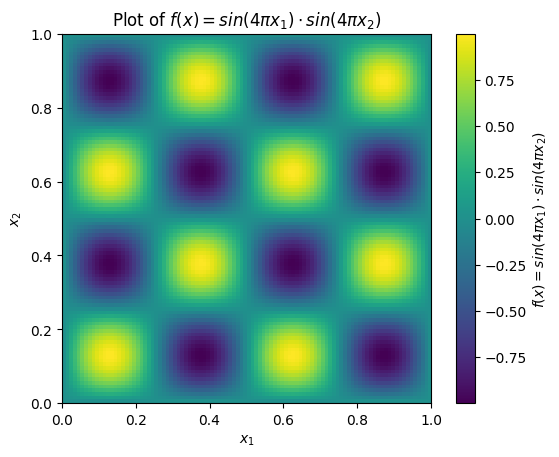

In [2]:
from models_and_procedures_definitions import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


# Define the target function
def f(x1, x2):
    return np.sin(4 * np.pi * x1) * np.sin(4 * np.pi * x2)

# Create a grid of points in the domain [0, 1]^2
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)
X1, X2 = np.meshgrid(x1, x2)

# Compute the function values at the grid points
Z = f(X1, X2)

# Plot the target function using imshow
plt.imshow(Z, extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
plt.colorbar(label='$f(x) = sin(4 \pi x_1) \cdot sin(4 \pi x_2)$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Plot of $f(x) = sin(4 \pi x_1) \cdot sin(4 \pi x_2)$')
plt.show()

In [12]:
models = initialize_all_models(input_dimension=2, seed_val=1)
compile_models(models)

# Generate the training data
X_train = np.random.uniform(0, 1, (10000, 2))
y_train = f(X_train[:, 0], X_train[:, 1])


# Initialize list to store history of losses for each model
histories = []

# Fit each model to the training data
for model, name in models:
    print(f"Training {name}...")
    history = model.fit(X_train, y_train, epochs=1, batch_size=100)
    histories.append(history)

Training Wide ReLU ANN...
100/100 [==============================] - 0s 1ms/step - loss: 0.4219
Training Deep ReLU ANN...
100/100 [==============================] - 0s 881us/step - loss: 0.4043
Training Spline ANN (z=20)...
100/100 [==============================] - 0s 811us/step - loss: 0.4056
Training ABEL-Spline (z=20)...
100/100 [==============================] - 1s 940us/step - loss: 0.4069
Training Lookup Table (z=20)...
100/100 [==============================] - 0s 797us/step - loss: 0.3881


Predicting with Wide ReLU ANN...
313/313 [==============================] - 0s 667us/step
Predicting with Deep ReLU ANN...
313/313 [==============================] - 0s 993us/step
Predicting with Spline ANN (z=20)...
313/313 [==============================] - 0s 644us/step
Predicting with ABEL-Spline (z=20)...
313/313 [==============================] - 0s 718us/step
Predicting with Lookup Table (z=20)...
313/313 [==============================] - 0s 1ms/step


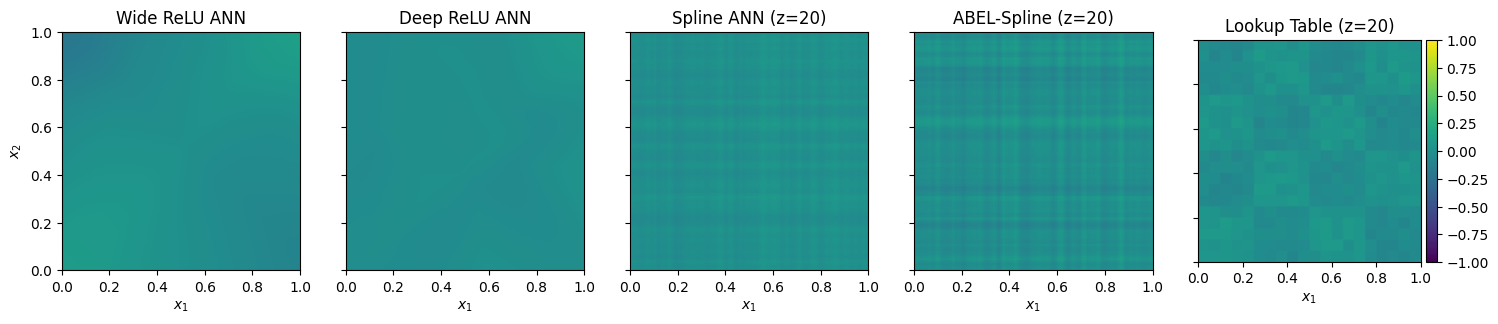

In [13]:
predictions = predict_models(models)
plot_predictions(models, predictions, plot_name='predictions', save=False)

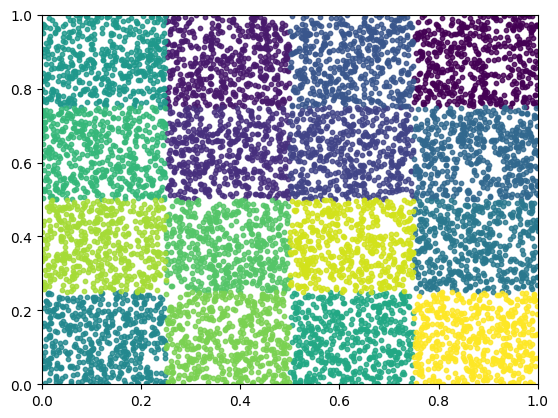

In [27]:
import random

# Define the number of partitions per dimension
n_partitions = 4

# Create a list to store the partitions' limits
partitions = []

# Create equally sized intervals in [0, 1]^2
for i in range(n_partitions):
    for j in range(n_partitions):
        partitions.append([(i/n_partitions, (i+1)/n_partitions), (j/n_partitions, (j+1)/n_partitions)])

# Randomly shuffle the order of the partitions
random.shuffle(partitions)

# Create a list to store all training data and labels
all_X_train = []
all_y_train = []

#colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Generate 16 values evenly spaced between 0 and 1 for colormap
values = np.linspace(0, 1, n_partitions**2)
colormap = plt.cm.viridis
colors = colormap(values)

fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# For each partition generate 500 training points and train all models on them
for idx, ((x1_min, x1_max), (x2_min, x2_max)) in enumerate(partitions):
    # Generate training data within the current partition and evaluate the function at these points
    X_train_partition = np.random.uniform([x1_min, x2_min], [x1_max, x2_max], (500, 2))
    y_train_partition = f(X_train_partition[:, 0], X_train_partition[:, 1])

    # Append the current partition's data to all_X_train and all_y_train 
    all_X_train.append(X_train_partition)
    all_y_train.append(y_train_partition)

    # Plot the sampled points for visual confirmation
    ax.scatter(X_train_partition[:, 0], X_train_partition[:, 1], color=colors[idx % len(colors)], alpha=0.82, s=10.)

# Concatenate all training data and labels into numpy arrays
all_X_train = np.concatenate(all_X_train, axis=0)
all_y_train = np.concatenate(all_y_train, axis=0)

plt.show()


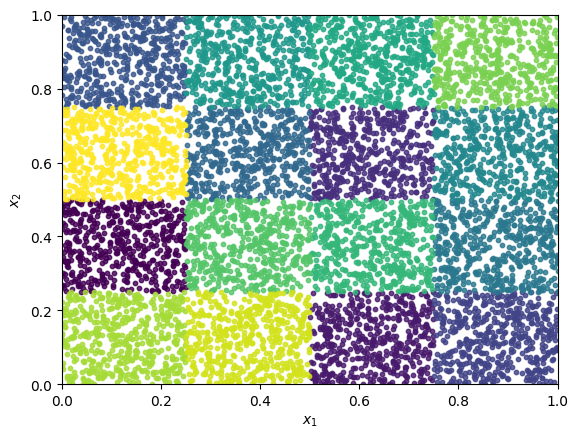

In [32]:
import random
import matplotlib.pyplot as plt
import numpy as np

def create_partitions(n_partitions):
    # Create a list to store the partitions' limits
    partitions = []

    # Create equally sized intervals in [0, 1]^2
    for i in range(n_partitions):
        for j in range(n_partitions):
            partitions.append([(i/n_partitions, (i+1)/n_partitions), (j/n_partitions, (j+1)/n_partitions)])

    # Randomly shuffle the order of the partitions
    random.shuffle(partitions)

    return partitions

def generate_training_data(partitions, n_samples):
    # Create a list to store all training data and labels
    all_X_train = []
    all_y_train = []

    # For each partition generate training points and train all models on them
    for idx, ((x1_min, x1_max), (x2_min, x2_max)) in enumerate(partitions):
        # Generate training data within the current partition and evaluate the function at these points
        X_train_partition = np.random.uniform([x1_min, x2_min], [x1_max, x2_max], (n_samples, 2))
        y_train_partition = f(X_train_partition[:, 0], X_train_partition[:, 1])

        # Append the current partition's data to all_X_train and all_y_train 
        all_X_train.append(X_train_partition)
        all_y_train.append(y_train_partition)

    # Concatenate all training data and labels into numpy arrays
    all_X_train = np.concatenate(all_X_train, axis=0)
    all_y_train = np.concatenate(all_y_train, axis=0)

    return all_X_train, all_y_train

def plot_training_data(partitions,X,y,n_samples):

    values = np.linspace(0, 1, n_partitions**2)
    colormap = plt.cm.viridis
    colors = colormap(values)

    fig, ax = plt.subplots()
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    for idx in range(len(partitions)):
       # Plot the sampled points for visual confirmation
       ax.scatter(X[idx*n_samples:(idx+1)*n_samples, 0], X[idx*n_samples:(idx+1)*n_samples, 1], color=colors[idx % len(colors)], alpha=0.82, s=10.)

    ax.set_xlabel('$x_1$') 
    ax.set_ylabel('$x_2$')
   
    plt.show()

# Define the number of partitions per dimension
n_partitions = 4

# Number of samples per partition
n_samples = 500

partitions=create_partitions(n_partitions)
X,y=generate_training_data(partitions,n_samples)
plot_training_data(partitions,X,y,n_samples)

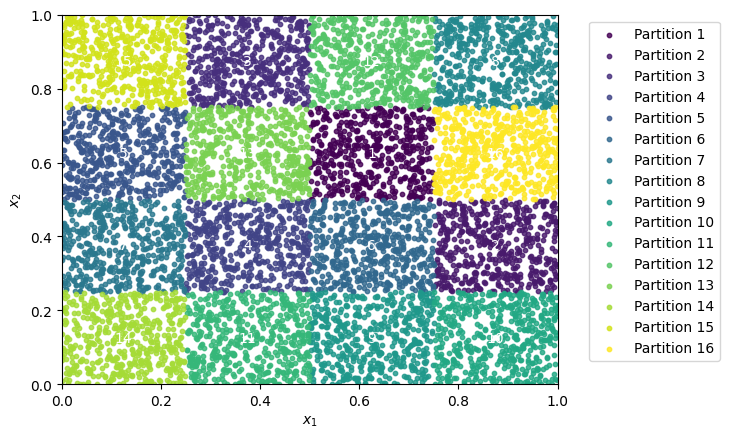

In [38]:
import random
import matplotlib.pyplot as plt
import numpy as np

def create_partitions(n_partitions):
    # Create a list to store the partitions' limits
    partitions = []

    # Create equally sized intervals in [0, 1]^2
    for i in range(n_partitions):
        for j in range(n_partitions):
            partitions.append([(i/n_partitions, (i+1)/n_partitions), (j/n_partitions, (j+1)/n_partitions)])

    # Randomly shuffle the order of the partitions
    random.shuffle(partitions)

    return partitions

def generate_training_data(partitions, n_samples):
    # Create a list to store all training data and labels
    all_X_train = []
    all_y_train = []

    # For each partition generate training points and train all models on them
    for idx, ((x1_min, x1_max), (x2_min, x2_max)) in enumerate(partitions):
        # Generate training data within the current partition and evaluate the function at these points
        X_train_partition = np.random.uniform([x1_min, x2_min], [x1_max, x2_max], (n_samples, 2))
        y_train_partition = f(X_train_partition[:, 0], X_train_partition[:, 1])

        # Append the current partition's data to all_X_train and all_y_train 
        all_X_train.append(X_train_partition)
        all_y_train.append(y_train_partition)

    # Concatenate all training data and labels into numpy arrays
    all_X_train = np.concatenate(all_X_train, axis=0)
    all_y_train = np.concatenate(all_y_train, axis=0)

    return all_X_train, all_y_train

def plot_training_data(partitions,X,y,n_samples):

    values = np.linspace(0, 1, n_partitions**2)
    colormap = plt.cm.viridis
    colors = colormap(values)

    fig, ax = plt.subplots()
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    for idx in range(len(partitions)):
        # Plot the sampled points for visual confirmation
        ax.scatter(X[idx*n_samples:(idx+1)*n_samples, 0], X[idx*n_samples:(idx+1)*n_samples, 1], color=colors[idx % len(colors)], alpha=0.82, s=10., label='Partition '+str(idx+1))
        ax.text((partitions[idx][0][0]+partitions[idx][0][1])/2,(partitions[idx][1][0]+partitions[idx][1][1])/2,str(idx+1), color='white',ha='center',va='center')

    ax.set_xlabel('$x_1$') 
    ax.set_ylabel('$x_2$')

    # Place a legend to the right of this smaller subplot.
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

# Define the number of partitions per dimension
n_partitions = 4

# Number of samples per partition
n_samples = 500

partitions=create_partitions(n_partitions)
X,y=generate_training_data(partitions,n_samples)
plot_training_data(partitions,X,y,n_samples)

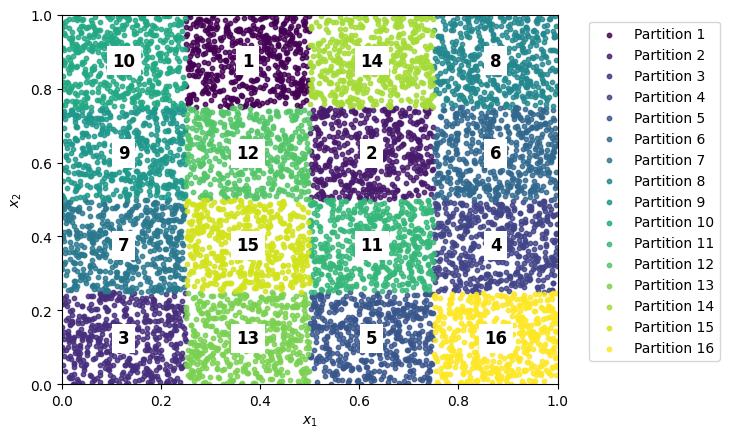

In [45]:
# Define the number of partitions per dimension
n_partitions = 4

# Number of samples per partition
n_samples = 500

partitions=create_partitions(n_partitions)
X,y=generate_training_data(partitions,n_samples)
plot_training_data(partitions,X,y,n_samples, plot_name='partitions', save=False)